In [1]:
from astropy.io import fits
HDU_list = fits.open('gll_iem_v02_P6_V11_DIFFUSE.fit')

In [2]:
HDU_list.info()

Filename: gll_iem_v02_P6_V11_DIFFUSE.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   (720, 360, 30)   float32   
  1  ENERGIES      1 BinTableHDU     19   30R x 1C   [D]   


We can see that there are 2 HDU in the file

In [3]:
HDU_list[0].header

SIMPLE  =                    T / Written by IDL:  Thu Jan 20 07:19:05 2011      
BITPIX  =                  -32 /                                                
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  720 / length of data axis 1                          
NAXIS2  =                  360 / length of data axis 2                          
NAXIS3  =                   30 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FLUX    =        8.42259635886 /                                                
CRVAL1  =                   0. / Value of longitude in pixel CRPIX1             
CDELT1  =                  0.5 / Step size in longitude                         
CRPIX1  =                360

 What is the length of axis 3?   
 We see from the primary header that the length of the data axis 3 is 30   
 What is the axis 3 supposed to be?  
 the axis 3 represents the photon energy ( the spectra of light )  
 What are the units of axis 3?  
 the axis 3 has units of Mega Electron Volts (MeV)  
 What is the name of the telescope?  
 Telescope value is given to be GLAST  
 What is the name of the observer?  
 Observer value is given to be MICHELSON  

In [4]:
import numpy as np
np.shape(HDU_list[0].data)

(30, 360, 720)

In [5]:
first_slice = HDU_list[0].data[0]
np.shape(first_slice)

(360, 720)

In [6]:
print('First Slice Values')
maximum = first_slice.max()
print(f'Maximum : {maximum}')
minimum = first_slice.min()
print(f'Minimum : {minimum}')
print(f'Standard Deviation : {first_slice.std()}')

First Slice Values
Maximum : 4.592152254190296e-05
Minimum : 7.027716719676391e-08
Standard Deviation : 1.384359507028421e-06


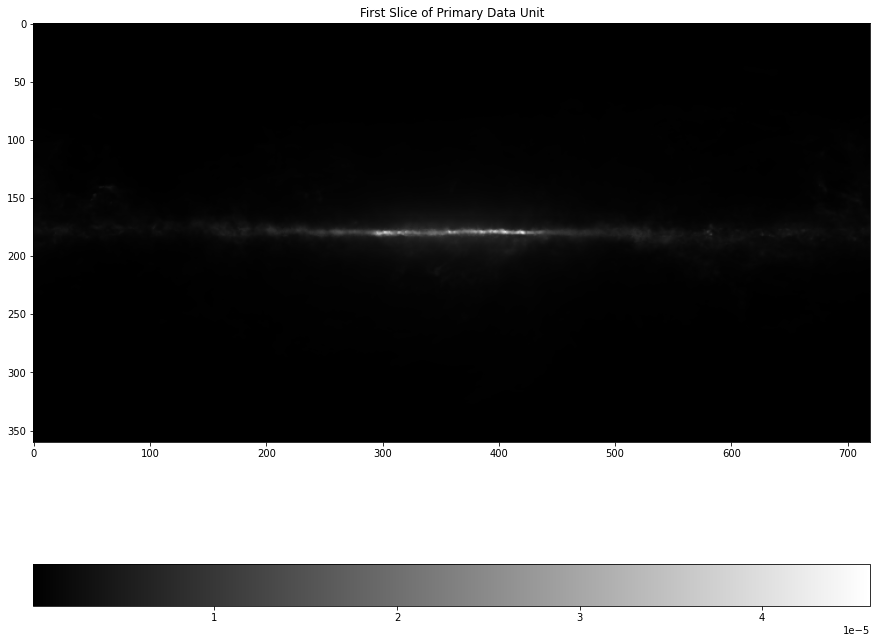

In [7]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
plt.imshow(first_slice,vmax=maximum,vmin=minimum,cmap='gray')
plt.colorbar(orientation='horizontal')
plt.title('First Slice of Primary Data Unit')
plt.show()

In [8]:
Stacked_array = first_slice.copy()
for i in range (30):
    if ((i+1)%5)==0 :
        current_slice=HDU_list[0].data[i]
        Stacked_array += current_slice

Stacked Image Values
Maximum : 5.6829070672392845e-05
Minimum of : 8.366378523305684e-08
Standard Deviation :1.739273102430161e-06


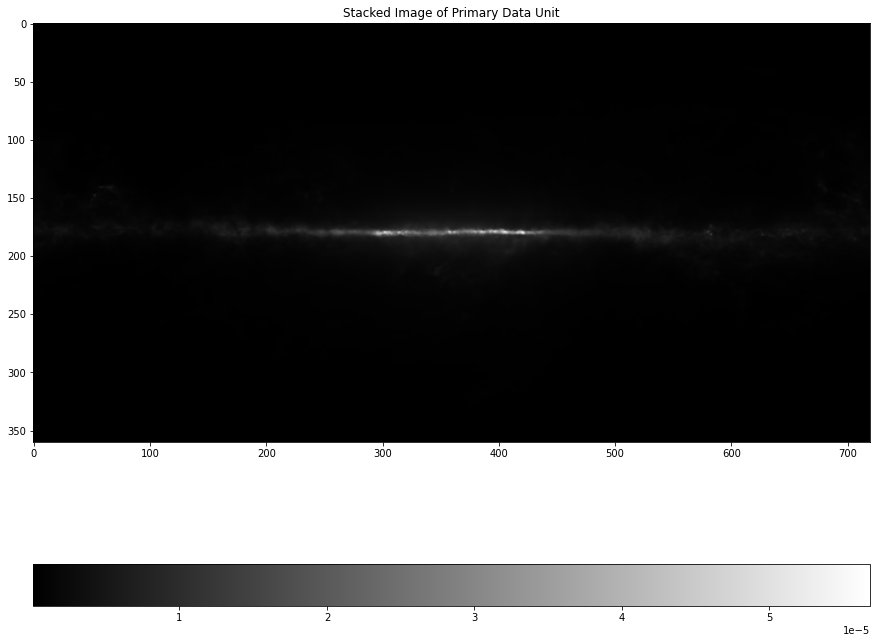

In [9]:
final_min = Stacked_array.min()
final_max = Stacked_array.max()
print('Stacked Image Values')
print(f'Maximum : {final_max}')
print(f'Minimum of : {final_min}')
print(f'Standard Deviation :{Stacked_array.std()}')

plt.figure(figsize=(15,15))
plt.imshow(Stacked_array,vmin= final_min,vmax= final_max,cmap = 'gray')
plt.colorbar(orientation='horizontal')
plt.title('Stacked Image of Primary Data Unit')
plt.show()

In [49]:
from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astropy.time import Time

def Altitude(coordinates,time):
    iitm = EarthLocation(lat=12.992*u.deg, lon=80.234*u.deg, height=50*u.m)
    location_time = Time(time)- 5.5 * u.hour # converting the given time to IST assuming it is given in UTC
    coord_array=[]
    future =[]
    for i in range(0,13):
        future.append(location_time + (i)*u.hour) # adding the forward time
        coords_h = coordinates.transform_to(AltAz(obstime = future[i], location = iitm))
        coord_array.append(coords_h.alt.deg)
    x=np.arange(13)
    plt.figure()
    plt.plot(x,coord_array)
    plt.title('Plot of Altitude in 12 hour Time Frame')
    plt.ylabel('Altitude: (Degrees)')
    plt.xlabel('Hours After initial Observation')
    plt.show()

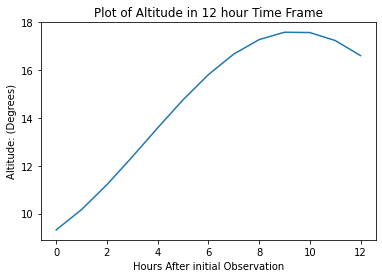

In [50]:
coord = SkyCoord(12.11 * u.deg, 85.26 * u.deg)
date_time = '2021-7-14 20:00:00'
Altitude(coord, date_time)
# example of calling the function